In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Import Dataset

In [2]:
# load dataset here

url = 'https://drive.google.com/file/d/1nzAoJC1uVG3SsDMSM9Kg8TjbUIHbGY-A/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

raw = pd.read_csv(url)
df = raw.copy()

In [3]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1435,2,75.00,0,0.00,14,851.000000,0.000000,0.014286,22.889086,0.0,Mar,1,1,1,2,New_Visitor,True,True
2295,0,0.00,0,0.00,2,44.000000,0.000000,0.100000,0.000000,0.0,May,1,1,8,1,Returning_Visitor,False,False
8872,4,95.75,12,886.25,154,7838.556598,0.003765,0.014926,0.000000,0.0,Nov,3,2,6,2,Returning_Visitor,True,False
2983,0,0.00,0,0.00,7,117.500000,0.000000,0.033333,0.000000,0.0,May,4,2,8,3,Returning_Visitor,True,False
2631,10,262.00,0,0.00,22,623.416667,0.018519,0.045267,0.000000,0.2,May,3,2,1,2,Returning_Visitor,False,False


# Exploratory Data Analysis (EDA)

## General dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The dataset consists of **18 columns** (15 numeric, 2 objects, and 2 booleans) and **12330 rows**, where **there is no blank data**.

In [6]:
# change data type
df = df.astype({'OperatingSystems': object, 'Browser': object, 'Region': object, 'TrafficType': object})

numericals   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
timestamps   = ['Month']

## Statistics summary 

In [7]:
# numerical features
df[numericals].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Skewness:
* All features (columns) are positive skew.

There are several summary values ​​that need to be marked:
* Q1, Q2, Q3 for *Informational*, *Informational_Duration*, and *SpecialDay* worth 0.
* The maximum value for *PageValues* is very large, indicating an outlier.

In [8]:
# categorical features
df[categoricals].describe()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330
unique,8,13,9,20,3,2,2
top,2,2,1,2,Returning_Visitor,False,False
freq,6601,7961,4780,3913,10551,9462,10422


In [9]:
# timestamp feature distribution
for col in timestamps:
    print(f'value count kolom {col}:')
    print(df[col].value_counts())
    print()

value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64



Most visiting customers:
* Returning Visitors
* On weekdays
* No purchases
* In May

## Feature Distribution for Each Revenue Value

### Numerical Features

**Boxplot**

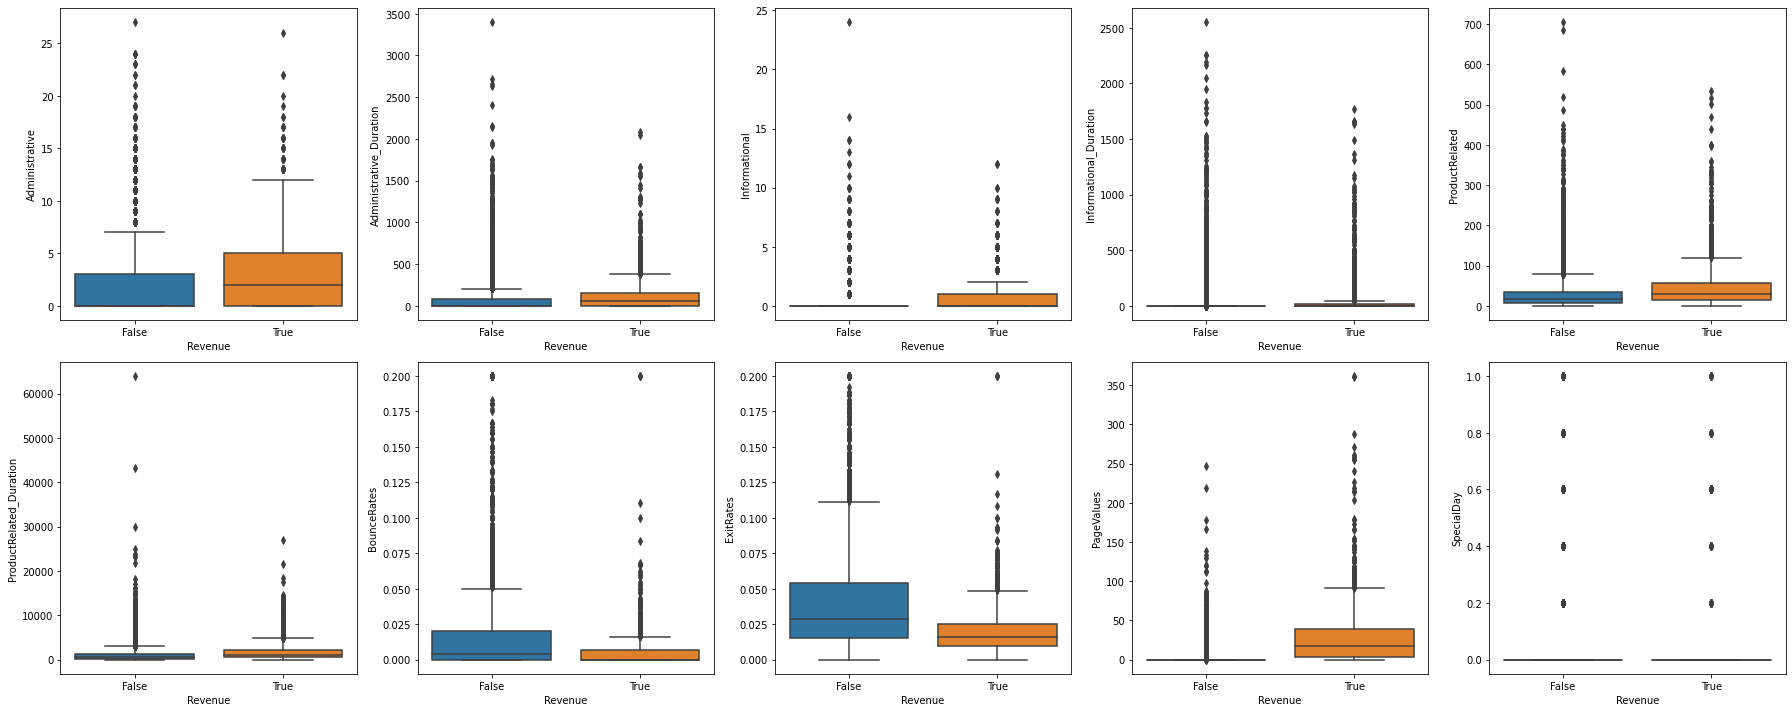

In [10]:
# boxplot untuk setiap kategori
rcParams['figure.figsize'] = 25, 10

for i in range(0, len(numericals)-1):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x = df['Revenue'], y = df[numericals[i]])
    plt.tight_layout()

* In each feature there are quite a lot of outliers.
* Distribution of Bounce Rates and Exit Rates values ​​for customers who do not make purchases tend to be higher than those who do.


**Probability Density Distribution Plot**

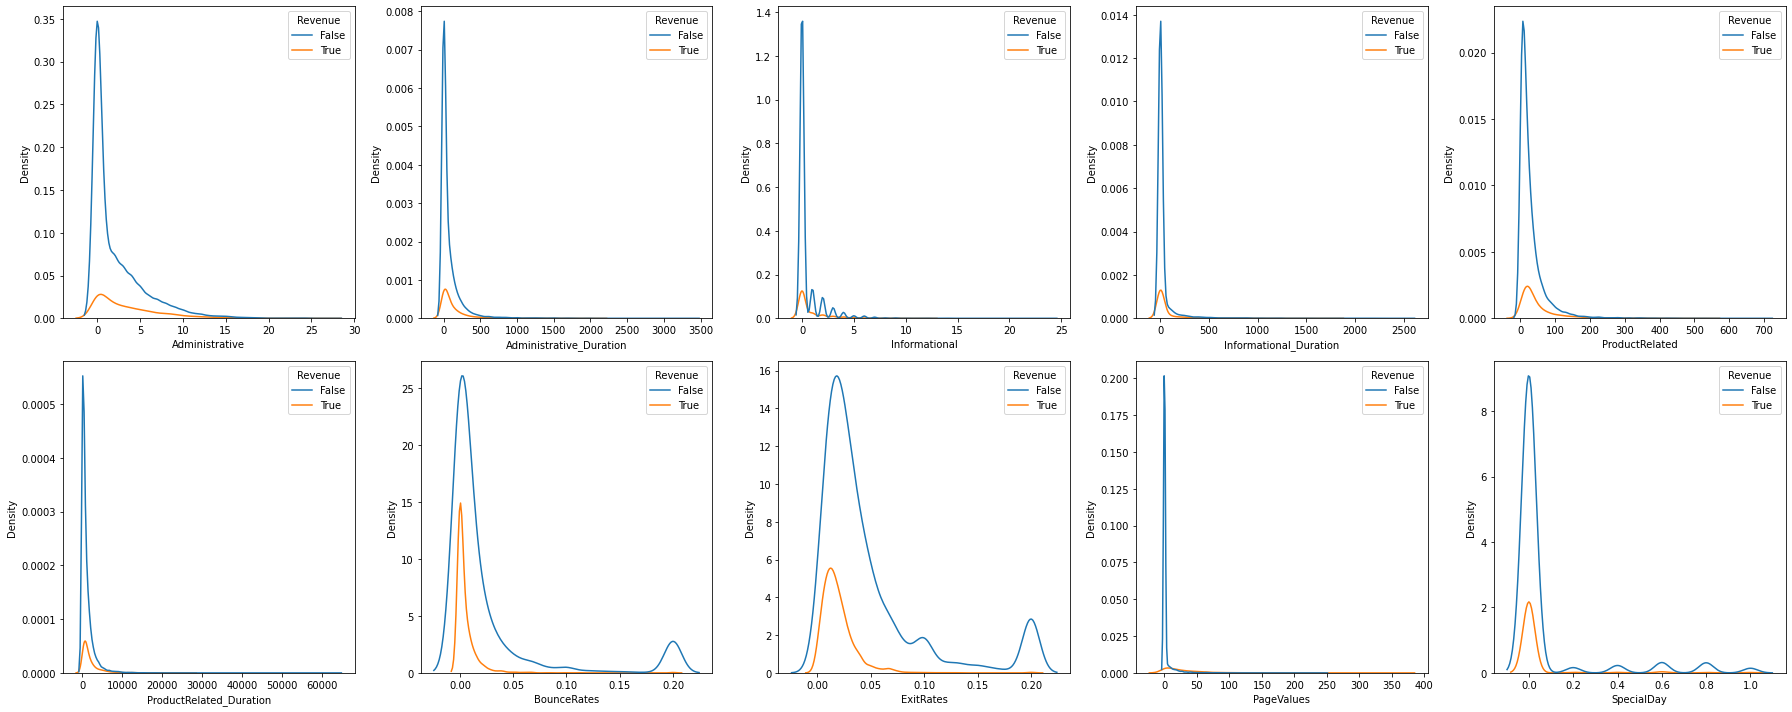

In [11]:
# displot for numerical features
for i in range(0, len (numericals)-1):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x = df[numericals[i]], hue = df['Revenue'])
    plt.xlabel(numericals[i])
    plt.tight_layout()

* Overall, each feature has a positive skew distribution.
* Customers tend to rarely visit Administrative and Informational pages

### Correlation Heatmap (Numerical)

Text(0.5, 1.0, 'Data Correlation')

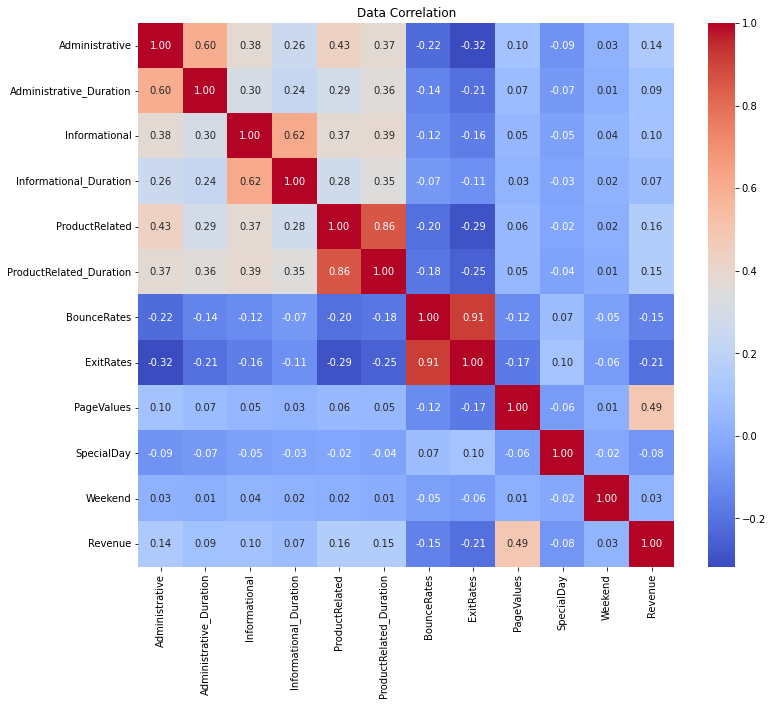

In [12]:
# numerical correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

Other feature correlation values ​​with target features (**Revenue**):
* Highest positive: PageValues ​​(0.49)
* Most negative: ExitRates (-0.21)
* Other features are range from 0.03-0.16

Features that have a correlation value > 0.8:
* ExitRates and BounceRates (0.91)
* ProductRelated and ProductRelatedDuration (0.86)

**Relationship of PageValues ​​and ExitRates with Purchase Conversion Rate**

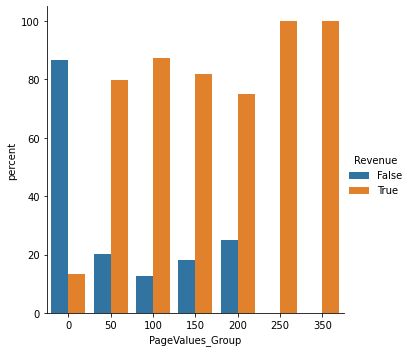

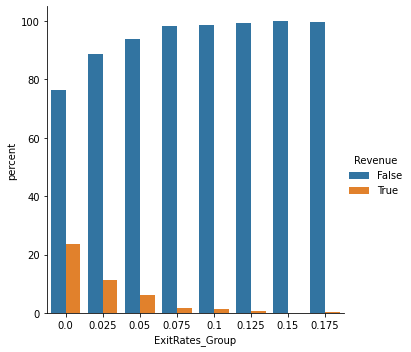

In [13]:
# persentase histogram nilai pagevalues untuk setiap nilai revenue

# split data frame in predifined PageValues groups
def cutPV(df):
    return pd.cut(
        df,[-1, 50, 100, 150, 200, 250, 300, 350, 400], 
        labels=[0, 50, 100, 150, 200, 250, 300, 350])

# split data frame in predifined ExitRates groups
def cutER(df):
    return pd.cut(
        df,[-1, 0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175, 0.201], 
        labels=[0, 0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175])

new_df = df
new_df['PageValues_Group'] = new_df[['PageValues']].apply(cutPV)
new_df['ExitRates_Group'] = new_df[['ExitRates']].apply(cutER)

first = new_df.groupby(['Revenue', 'PageValues_Group']).count().reset_index()
first['Count'] = first['Administrative']
first = first[['Revenue', 'PageValues_Group', 'Count']]

second = new_df.groupby(['Revenue', 'ExitRates_Group']).count().reset_index()
second['Count'] = second['Administrative']
second = second[['Revenue', 'ExitRates_Group', 'Count']]

# (a) PageValues
x, y = 'PageValues_Group', 'Revenue'
(df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.show()

# (b) ExitRates
x, y = 'ExitRates_Group', 'Revenue'
(df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.show()

Users who make purchases (Revenue = True) in general have:
* Larger **PageValues** values
* Smaller **ExitRates** and **BounceRates** values
Based on the visualization above, an initial hypothesis can be built that PageValues ​​and ExitRates affect changes in the value of the purchase conversion rate.

### Categorical Features

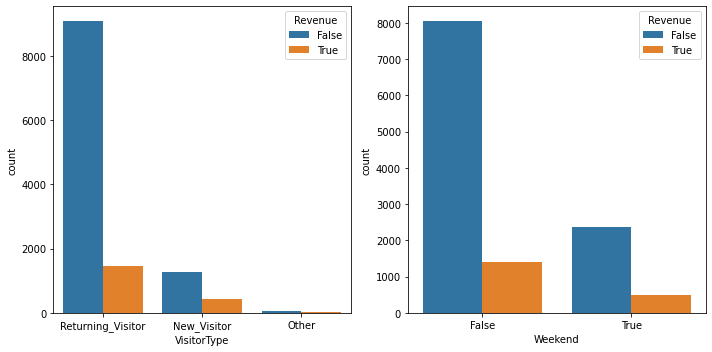

In [14]:
# the number of users who made purchases and not for any other features
others_bool = ['VisitorType', 'Weekend']

rcParams['figure.figsize'] = 10, 5
for i in range(0, len(others_bool)):
    plt.subplot (1, 2, i+1)
    sns.countplot(data = df, x = others_bool[i], hue = 'Revenue')
    plt.tight_layout()

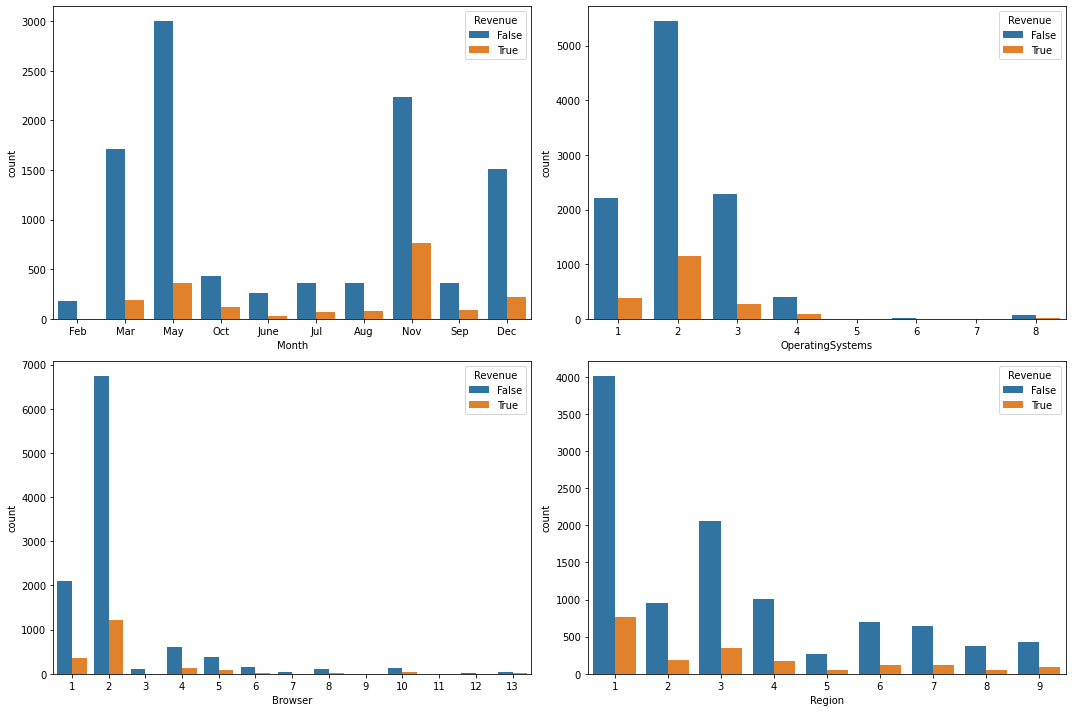

In [15]:
# the number of users who made purchases and not for any other features
others = ['Month', 'OperatingSystems', 'Browser', 'Region']

rcParams['figure.figsize'] = 15, 10
for i in range(0, len(others)):
    plt.subplot (2, 2, i+1)
    sns.countplot(data = df, x = others[i], hue = 'Revenue')
    plt.tight_layout()

The majority of customers who make purchases are:
* Visitor Type: Returning Visitor
* Weekends: False
* Month: Nov
* Operating Systems: 2
* Browsers: 2
* Regions: 1

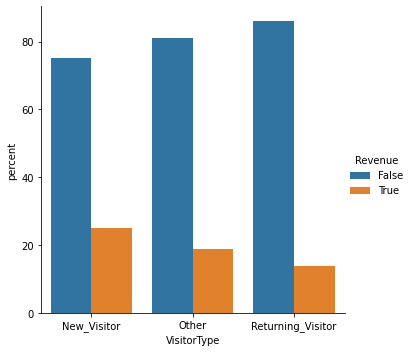

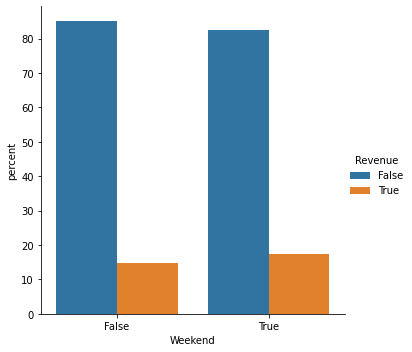

In [16]:
# percentage for each revenue value
rcParams['figure.figsize'] = 12, 10
for x in ['VisitorType', 'Weekend']:
  (df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
  plt.show()

Percentage of users who made a purchase for each feature (estimated)
* Visitor Type: New 23%, Return 19%, Others 17%
* Weekends: False 15%, True 16%

Based on the distribution plot of the number and percentage of the conversion rate, it is obtained:
* The number of ReturningVisitors is quite large, but only 19% make purchases.
* Many users visit pages on weekdays, but quite a few don't make purchases.

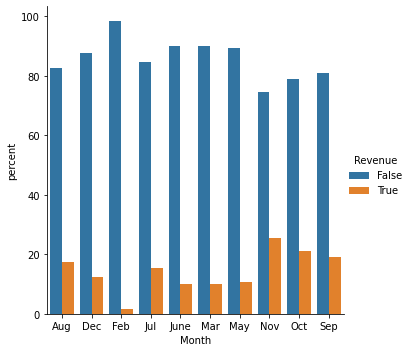

In [17]:
x = 'Month'
(df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.show()

**Other Features**

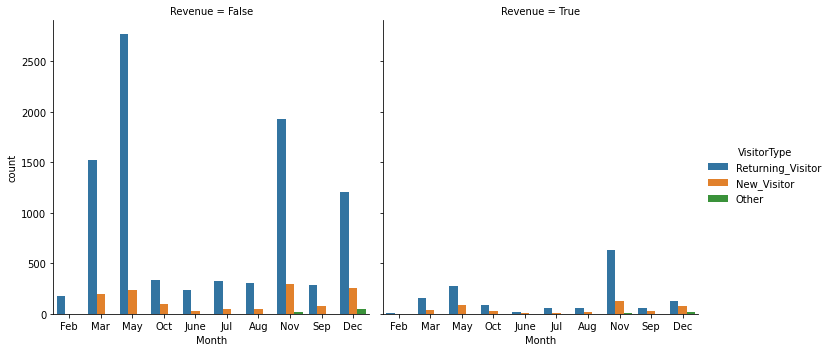

In [18]:
# distribution of users who come every month based on the Visitor Type
rcParams['figure.figsize'] = 15, 15
sns.catplot(data = df, x = 'Month', hue = 'VisitorType', kind = 'count', col = 'Revenue')

* Users who made the most purchases were ReturningVisitors in November, then followed in May
* Users who make the most visits are ReturningVisitors in May followed by March, November and December

### Categorical Feature Hypothesis Test

H0: feature categoricals [i] and independent revenue. <br>
H1: feature categoricals [i] and dependent revenue.

In [19]:
import scipy.stats as st
from scipy.stats import chi2_contingency

In [20]:
def uji_hipotesis(data):
  p_value = chi2_contingency(pd.crosstab(df[feature], df.Revenue))[1]
  print(f'p-value: {p_value}')

  if p_value > 0.05:
    print(f'Accept H0, feature {feature} is independent with Revenue')
  else:
    print(f'Reject H0, feature {feature} is dependen with Revenue')

In [21]:
for feature in categoricals:
  print(f'Uji hipotesis {feature} - Revenue')
  uji_hipotesis(feature)
  print('')

print(f'Uji hipotesis Month - Revenue')
uji_hipotesis('Month')
print('')

Uji hipotesis OperatingSystems - Revenue
p-value: 1.4160941129614401e-13
Reject H0, feature OperatingSystems is dependen with Revenue

Uji hipotesis Browser - Revenue
p-value: 0.00608754317955109
Reject H0, feature Browser is dependen with Revenue

Uji hipotesis Region - Revenue
p-value: 0.3214249979076556
Accept H0, feature Region is independent with Revenue

Uji hipotesis TrafficType - Revenue
p-value: 1.652735258160153e-67
Reject H0, feature TrafficType is dependen with Revenue

Uji hipotesis VisitorType - Revenue
p-value: 4.269904152293867e-30
Reject H0, feature VisitorType is dependen with Revenue

Uji hipotesis Weekend - Revenue
p-value: 0.0012663251061221968
Reject H0, feature Weekend is dependen with Revenue

Uji hipotesis Revenue - Revenue
p-value: 0.0
Reject H0, feature Revenue is dependen with Revenue

Uji hipotesis Month - Revenue
p-value: 0.0
Reject H0, feature Revenue is dependen with Revenue



# Data Pre-Processing

In [22]:
df = raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Data Cleaning

### Duplicated data

In [23]:
# drop duplicated rows
df.drop_duplicates(inplace=True)   # keep = 'First'

In [24]:
# percentage of duplicate data that is dropped
print(f'Duplicate data drop percentage: {round(((len(raw)-len(df))/len(raw))*100, 2)}%')


Duplicate data drop percentage: 1.01%


### Handling outliers

**Outlier check**

In [25]:
# IQR function 
def IQR(x):
  x = x.astype(np.float32)
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  
  bb = q1 - 1.5*(q3 - q1)
  ba = q3 + 1.5*(q3 - q1)

  outlier_indices = list(x.index[(x < bb) | (x > ba)])
  outlier_values = list(x[outlier_indices])

  return len(outlier_indices)

In [26]:
# IQR Method
for i in numericals:
  print(f'Number of IQR outliers {i}: {IQR(df[i])}')

Number of IQR outliers Administrative: 404
Number of IQR outliers Administrative_Duration: 1149
Number of IQR outliers Informational: 2631
Number of IQR outliers Informational_Duration: 2405
Number of IQR outliers ProductRelated: 1007
Number of IQR outliers ProductRelated_Duration: 951
Number of IQR outliers BounceRates: 1428
Number of IQR outliers ExitRates: 1325
Number of IQR outliers PageValues: 2730
Number of IQR outliers SpecialDay: 1249
Number of IQR outliers Revenue: 1908


The data gathers quite a lot at zero values, the distribution of each feature is not visible. Due to the large number of data with zero values, it is not possible to handle outliers using log transformation.

* If outliers are removed, then the percentage of outliers dropped (17.9% > 5%) is very large.
* No drop outliers are done, so the number of rows remains 12205.
* This is also supported by information in the dataset obtained through Google Analytics. At its maximum value, this value still has meaning. For example, Informational_Duration might occur when a user/visitor opens and then lets the page remain open on the device. But of course, it cannot be known with certainty the status of the outliers contained in the data.
* The existence of outliers in the data needs to be noted when modeling.

## Feature Encoding

In the dataset, there are:
* 6 categoricals: Month, OperatingSystems, Browser, Region, TrafficType and VisitorType
* 2 booleans: Weekend, Revenue

Will be done:
* Label encoding for Revenue, Weekend (False: 0, True: 1)
* One hot encoding feature for VisitorType

**Label Encoding (Revenue, Weekend)**

In [27]:
# library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label encoding for Revenue, Weekend (True: 1, False: 0)
df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])

In [28]:
# label encoding for Month
mapping_month = {'Jan' : 1, 'Feb' : 2,
                 'Mar' : 3, 'Apr' : 4,
                 'May' : 5, 'June' : 6,
                 'Jul' : 7, 'Aug' : 8,
                 'Sep' : 9, 'Oct' : 10,
                 'Nov' : 11, 'Dec' : 12}

df['Month'] = df['Month'].map(mapping_month)

**One Hot Encoding Feature Categorical**

In [29]:
# change feature VisitorType to feature dummies with VT prefix
onehot = pd.get_dummies(df['VisitorType'], prefix = 'VT')
df = df.join(onehot)

# drop feature VisitorType
df = df.drop(['VisitorType'], axis = 1)

In [30]:
# save the processed data into the df_processed dataset
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

## Feature Engineering

Text(0.5, 1.0, 'Data Correlation')

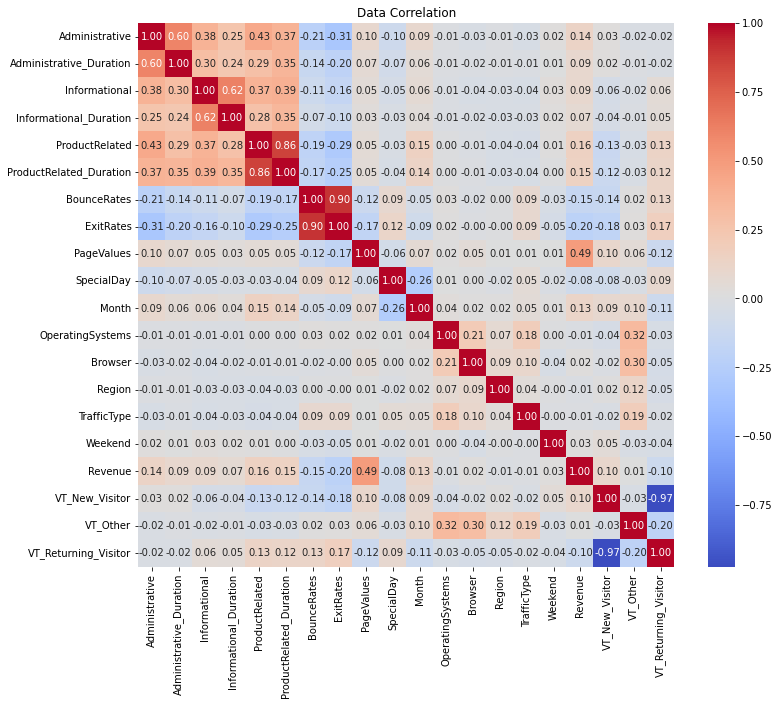

In [31]:
# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df_cleaned.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

Features with a correlation value > 0.80:
* ExitRates - BounceRates (0.90) redundant >> drop one
* VT_Returning_Visitor - VT_New_Visitor (0.97) >> drop one
* ProductRelated - ProductRelated_Duration (0.86) >> feature transformation

### Feature Selection

Redundant feature drops (BounceRates, VT_Returning_Visitor) and Region (based on hypothesis testing)

In [32]:
df_selected = df_cleaned.drop(['BounceRates', 'VT_Returning_Visitor', 'Region'], axis=1)
df_selected.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,2,2,2,2,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,3,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,2,3,2,4,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,2,3,3,4,1,0,0,0


### Feature Transformation

Transformation of three data sets that have a high correlation related to page types into the average duration per page opened

In [33]:
df_selected['Administrative_Duration_Page'] = df_selected['Administrative_Duration']/df_selected['Administrative']
df_selected['Informational_Duration_Page'] = df_selected['Informational_Duration']/df_selected['Informational']
df_selected['ProductRelated_Duration_Page'] = df_selected['ProductRelated_Duration']/df_selected['ProductRelated']

df_transformed = df_selected.drop(['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

# division by zero becomes zero
df_transformed['Administrative_Duration_Page'] = df_transformed['Administrative_Duration_Page'].fillna(0)
df_transformed['Informational_Duration_Page'] = df_transformed['Informational_Duration_Page'].fillna(0)
df_transformed['ProductRelated_Duration_Page'] = df_transformed['ProductRelated_Duration_Page'].fillna(0)

Text(0.5, 1.0, 'Data Correlation')

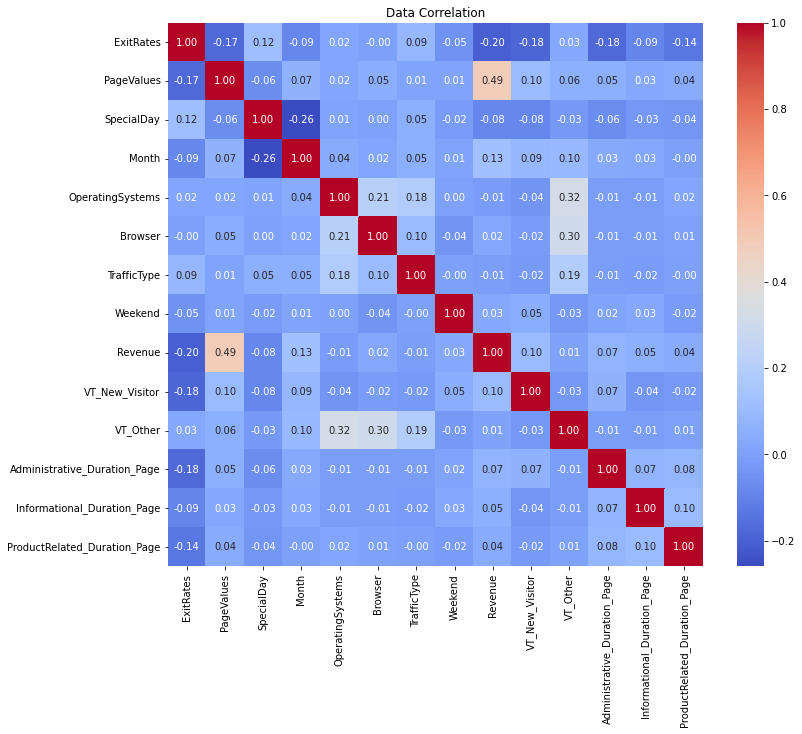

In [34]:
# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df_transformed.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

In [35]:
df_transformed.sample(5)

,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
1241,0.019531,0.0,0.0,3,3,2,2,0,0,0,0,10.444444,0.0,32.662698
11336,0.036508,0.0,0.0,12,2,2,3,0,0,0,0,0.000000,0.0,22.858333
4806,0.100000,0.0,0.0,5,2,2,4,0,0,0,0,0.000000,0.0,29.500000
3562,0.005714,0.0,0.0,5,2,2,2,0,0,1,0,120.000000,85.0,18.679798
6857,0.046667,0.0,0.0,6,2,2,2,0,0,0,0,0.000000,0.0,11.453333


In [36]:
# drop categorical features
df_droped = df_transformed.drop(['OperatingSystems', 'Browser', 'TrafficType', 'Month'], axis=1)

In [37]:
# save the feature engineering result dataset into the data dataset
data = df_droped.copy()

# Model & Evaluation

## Split data & data preparation

### Split data

In [38]:
# dataset check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ExitRates                     12205 non-null  float64
 1   PageValues                    12205 non-null  float64
 2   SpecialDay                    12205 non-null  float64
 3   Weekend                       12205 non-null  int64  
 4   Revenue                       12205 non-null  int64  
 5   VT_New_Visitor                12205 non-null  uint8  
 6   VT_Other                      12205 non-null  uint8  
 7   Administrative_Duration_Page  12205 non-null  float64
 8   Informational_Duration_Page   12205 non-null  float64
 9   ProductRelated_Duration_Page  12205 non-null  float64
dtypes: float64(6), int64(2), uint8(2)
memory usage: 1.1 MB


In [39]:
X = data.drop(['Revenue'], axis = 1) # features
y = data['Revenue'] # target

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Scaler transformation

In [40]:
# scaler transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# data train (X_train)
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_train = pd.DataFrame(X_train, columns = list(X.columns))

# data test (X_test)
X_test = scaler.transform(X_test_raw)
X_test = pd.DataFrame(X_test, columns = list(X.columns))

### Handling imbalance

In [41]:
# check the percentage of target value
y_train.value_counts(normalize = True)*100

0    84.057123
1    15.942877
Name: Revenue, dtype: float64

Note: the revenue target has an unbalanced class or imbalance.

In [42]:
from imblearn import over_sampling

X_over_smote, y_over_smote = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)
print('AFTER oversampling (smote)')
print(pd.Series(y_over_smote).value_counts())

AFTER oversampling (smote)
0    7181
1    3590
Name: Revenue, dtype: int64


## Function definition

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_validate

# evaluate model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train[:,1]))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba[:,1]))
  
    #score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)
    #print('ROC AUC (crossval train): '+ str(score['train_score'].mean()))
    #print('ROC AUC (crossval test): '+ str(score['test_score'].mean()))
    
# feature importance
def show_feature_importance(model):   
    feat_importances = pd.Series(model.feature_importances_,index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(28, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'{model}')

# hyperparameter
def show_best_hyperparameter(model):   
    print(model.best_estimator_.get_params())

## Model & Evaluation

### Logistic Regression <br>

In the dataset, there are quite extreme outliers, so the logistic model produces poor performance.

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_over_smote, y_over_smote) 
eval_classification(lr)

Accuracy Score(Train set): 0.89
Accuracy Score(Test set): 0.89
Precision Score (Train set):0.69
Precision Score (Test set):0.67
Recall Score (Train set):0.57
Recall Score (Test set):0.55
F1 Score (Train set):0.62
F1 Score (Test set):0.60
ROC AUC Score (Train-proba): 0.87
ROC AUC Score (Test-proba): 0.87


In [46]:
# coefficient of each features
value = lr.coef_

In [47]:
names = X.columns
table = {'names': names, 'value': value}
table

{'names': Index(['ExitRates', 'PageValues', 'SpecialDay', 'Weekend', 'VT_New_Visitor',
        'VT_Other', 'Administrative_Duration_Page',
        'Informational_Duration_Page', 'ProductRelated_Duration_Page'],
       dtype='object'),
 'value': array([[-0.90980086,  1.88189515, -0.27229508,  0.03176138,  0.02730069,
         -0.04263012,  0.0254919 ,  0.03565508,  0.00548184]])}

Feature PageValues ​​has the largest coefficient (+1.86), meaning that this feature has the most significant influence on the Revenue value, and is directly proportional. Meanwhile, the ExitRates feature has a significant inverse effect (-0.84).

**Analyzing Learning Curves**

In [48]:
#learning curve model
from sklearn.linear_model import LogisticRegression

def draw_learning_curve_logreg(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty = 'l2', C = c)
        model.fit(X_over_smote, y_over_smote)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_over_smote)
        train_auc = roc_auc_score(y_over_smote, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param_values: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; div: '+ str(train_auc - test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values: 0.0001; train: 0.8601549896255942; test: 0.8609378159281881; div: -0.0007828263025938531
param_values: 0.004179591836734694; train: 0.874752781151437; test: 0.8733562917612981; div: 0.001396489390138811
param_values: 0.008259183673469388; train: 0.8756420436318526; test: 0.8738153427659204; div: 0.0018267008659321737
param_values: 0.012338775510204082; train: 0.8759628763461611; test: 0.8738365026073627; div: 0.002126373738798426
param_values: 0.016418367346938776; train: 0.8761083391292172; test: 0.8738447314345903; div: 0.002263607694626857
param_values: 0.020497959183673472; train: 0.8761980605738061; test: 0.8738641279559123; div: 0.0023339326178938302
param_values: 0.024577551020408164; train: 0.8762598143739729; test: 0.8738741201032599; div: 0.0023856942707130013
param_values: 0.028657142857142857; train: 0.8763014361249645; test: 0.8738223960464011; div: 0.002479040078563366
param_values: 0.032736734693877556; train: 0.8763297140899907; test: 0.8737977095647185; d

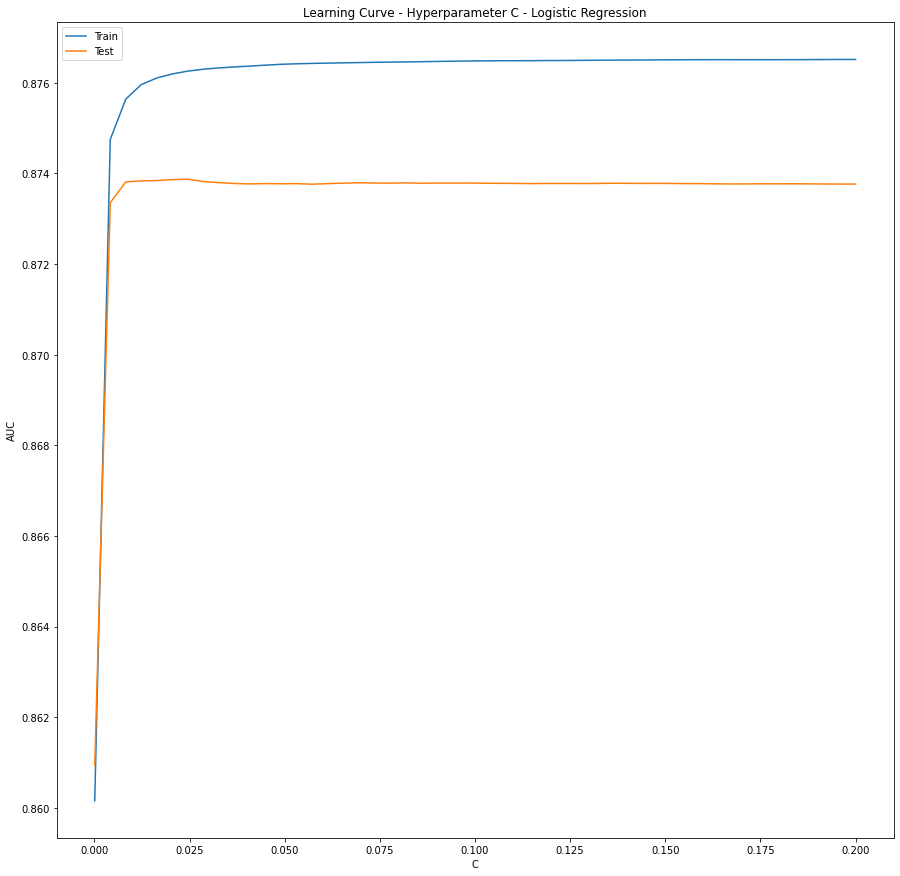

In [49]:
# best C hyperparameter
param_values = [float(x) for x in np.linspace(0.0001, 0.2, 50)]
draw_learning_curve_logreg(param_values)


Based on the learning curve above, the evaluation of AUC values ​​tends to converge at the train and test values ​​of 0.87. Therefore, to improve model performance, it is necessary to review feature selection and outliers.

**Feature Importance**

In [50]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


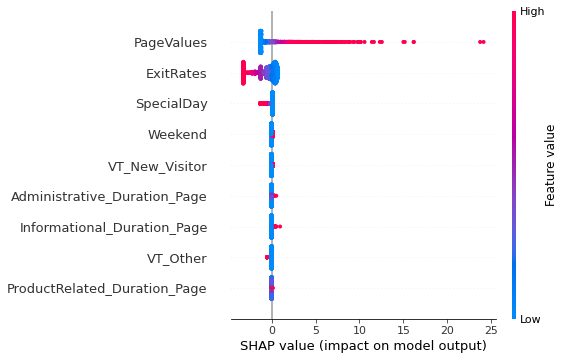

In [51]:
lr = LogisticRegression() 
lr.fit(X_over_smote, y_over_smote) 
explainer = shap.LinearExplainer(lr, X_over_smote)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Only 2 features have significant shape values: PageValues ​​and ExitRates.

### K-Nearest Neighbor (KNN) and Hyperparameter Tunning

In [52]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 99)
knn.fit(X_over_smote, y_over_smote)
eval_classification(knn)

Accuracy Score(Train set): 0.89
Accuracy Score(Test set): 0.88
Precision Score (Train set):0.66
Precision Score (Test set):0.61
Recall Score (Train set):0.61
Recall Score (Test set):0.59
F1 Score (Train set):0.63
F1 Score (Test set):0.60
ROC AUC Score (Train-proba): 0.88
ROC AUC Score (Test-proba): 0.86


There is no indication of overfitting but the performance of the model is not good enough.

**Hyperparameters Turning**

In [53]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [97, 99, 101, 103, 105]
p = [1, 2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors = n_neighbors, p = p, algorithm = algorithm)

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, scoring = 'roc_auc', random_state = 42, cv = 5)
knn_tuned.fit(X_over_smote, y_over_smote)
eval_classification(knn_tuned)

Accuracy Score(Train set): 0.89
Accuracy Score(Test set): 0.88
Precision Score (Train set):0.66
Precision Score (Test set):0.62
Recall Score (Train set):0.61
Recall Score (Test set):0.57
F1 Score (Train set):0.63
F1 Score (Test set):0.59
ROC AUC Score (Train-proba): 0.89
ROC AUC Score (Test-proba): 0.87


In [54]:
print('Best n_neighbors:', knn_tuned.best_estimator_.get_params()['n_neighbors'])
print('Best p:', knn_tuned.best_estimator_.get_params()['p'])
print('Best algorithm:', knn_tuned.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 99
Best p: 1
Best algorithm: ball_tree


**Analyzing Learning Curve**

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve_knn(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(X_over_smote, y_over_smote)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_over_smote)
        train_auc = roc_auc_score(y_over_smote, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; div: ' + str(train_auc-test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param value: 1; train: 0.9995821727019498; test: 0.7071401533853394; div: 0.2924420193166104
param value: 2; train: 0.99388538463657; test: 0.7711880545641777; div: 0.22269733007239223
param value: 3; train: 0.987155384120662; test: 0.7943598442635669; div: 0.19279553985709508
param value: 4; train: 0.97976180178349; test: 0.8114866787042654; div: 0.16827512307922465
param value: 5; train: 0.9741692232558915; test: 0.8215038064203661; div: 0.15266541683552537
param value: 6; train: 0.9692860570237384; test: 0.8347501610499043; div: 0.13453589597383409
param value: 7; train: 0.9648150353435773; test: 0.8436916634926905; div: 0.12112337185088673
param value: 8; train: 0.9611023790341192; test: 0.8484200063949743; div: 0.11268237263914493
param value: 9; train: 0.9569782376039526; test: 0.8525370649889262; div: 0.10444117261502639
param value: 10; train: 0.9536879276363384; test: 0.8528956067466978; div: 0.10079232088964052
param value: 11; train: 0.9504048520178014; test: 0.8560528314218

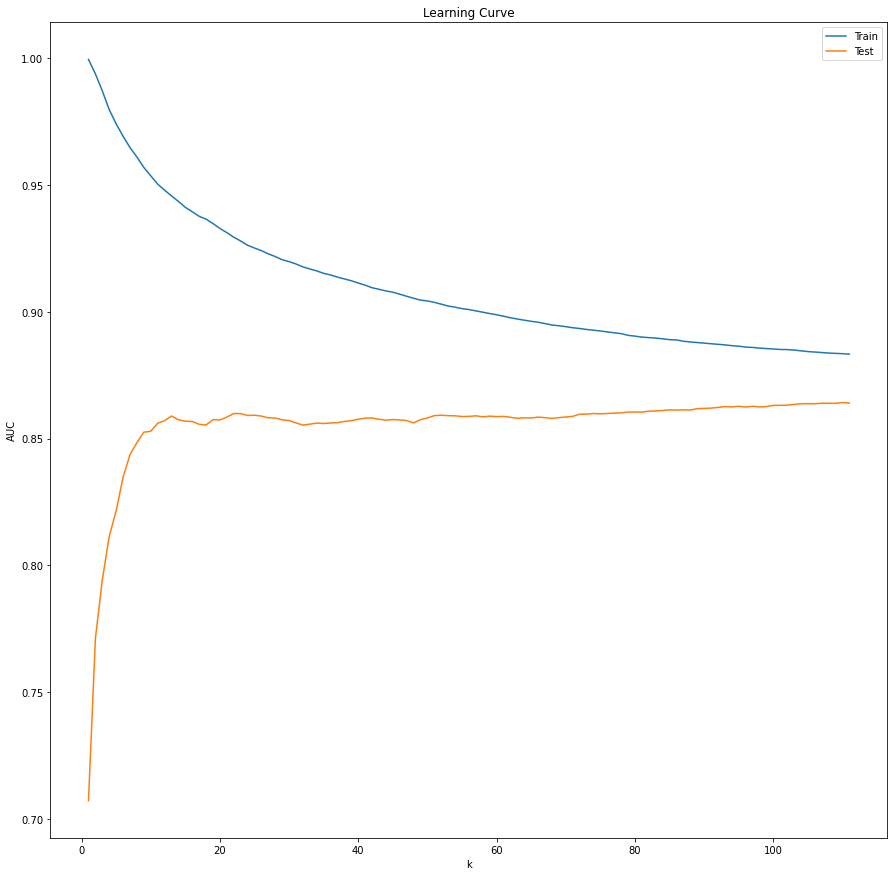

In [56]:
param_values = [int(x) for x in np.linspace(1, 111, 111)]
draw_learning_curve_knn(param_values)

Based on the learning curve above, the number of neighbors that produce the best evaluation is 99. The bigger the neighbors, the AUC value will gradually decrease.

**Feature Importance**

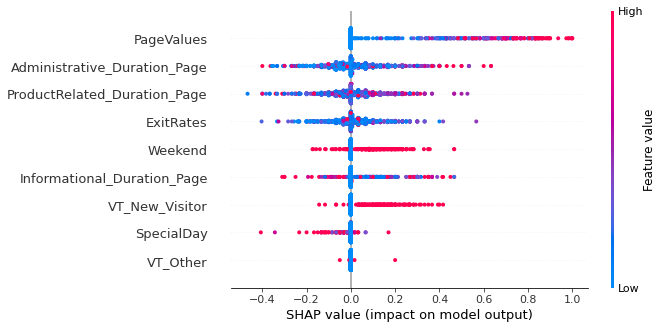

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_over_smote, y_over_smote)

f = lambda x: knn.predict_proba(x)[:, 1]
med = X_over_smote.median().values.reshape((1, X_over_smote.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test.iloc[0:1000, :])
shap.plots.beeswarm(shap_values)

### Decision Tree

In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_over_smote, y_over_smote)
eval_classification(dt)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.84
Precision Score (Train set):1.00
Precision Score (Test set):0.47
Recall Score (Train set):1.00
Recall Score (Test set):0.62
F1 Score (Train set):1.00
F1 Score (Test set):0.53
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.74


Based on the evaluation results of the decision tree model, it indicated overfitting. Need to do hyperparameters tuning.

**Hyperparameters Tuning**

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(8, 18, num = 10)] # Maximum number of levels in tree
min_samples_split = [78, 79, 80] # Minimum number of samples required to split a node
min_samples_leaf = [20, 60] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth = max_depth, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features,
                       criterion = criterion,
                       splitter = splitter
                      )

In [60]:
dt = DecisionTreeClassifier(random_state = 42)
dt_tuned = GridSearchCV(dt, hyperparameters, scoring = 'roc_auc', cv = 5)
dt_tuned.fit(X_over_smote, y_over_smote)
eval_classification(dt_tuned)

Accuracy Score(Train set): 0.90
Accuracy Score(Test set): 0.88
Precision Score (Train set):0.65
Precision Score (Test set):0.58
Recall Score (Train set):0.75
Recall Score (Test set):0.71
F1 Score (Train set):0.70
F1 Score (Test set):0.64
ROC AUC Score (Train-proba): 0.92
ROC AUC Score (Test-proba): 0.89


In [61]:
print('Best max_depth:', dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dt_tuned.best_estimator_.get_params()['max_features'])
print('Best criterion:', dt_tuned.best_estimator_.get_params()['criterion'])
print('Best splitter:', dt_tuned.best_estimator_.get_params()['splitter'])

Best max_depth: 16
Best min_samples_split: 80
Best min_samples_leaf: 20
Best max_features: auto
Best criterion: gini
Best splitter: best


**Analyzing Learning Curve**

param value: 50; train: 0.9219427311083606; test: 0.8964460870750985; div: 0.025496644033262017
param value: 51; train: 0.9219107486911258; test: 0.8973292165686261; div: 0.024581532122499694
param value: 52; train: 0.9220027393551304; test: 0.8972904235259819; div: 0.024712315829148568
param value: 53; train: 0.9220027199600928; test: 0.8972904235259819; div: 0.02471229643411088
param value: 54; train: 0.9219941861434868; test: 0.8972792558318873; div: 0.024714930311599548
param value: 55; train: 0.9219651517719888; test: 0.8977156775616338; div: 0.02424947421035495
param value: 56; train: 0.9219579368179492; test: 0.8977156775616338; div: 0.0242422592563154
param value: 57; train: 0.9219507218639097; test: 0.8977045098675394; div: 0.024246211996370337
param value: 58; train: 0.9219435069098701; test: 0.8977036282074793; div: 0.02423987870239086
param value: 59; train: 0.9219368350168873; test: 0.8976645412781483; div: 0.02427229373873896
param value: 60; train: 0.9218854963519875; te

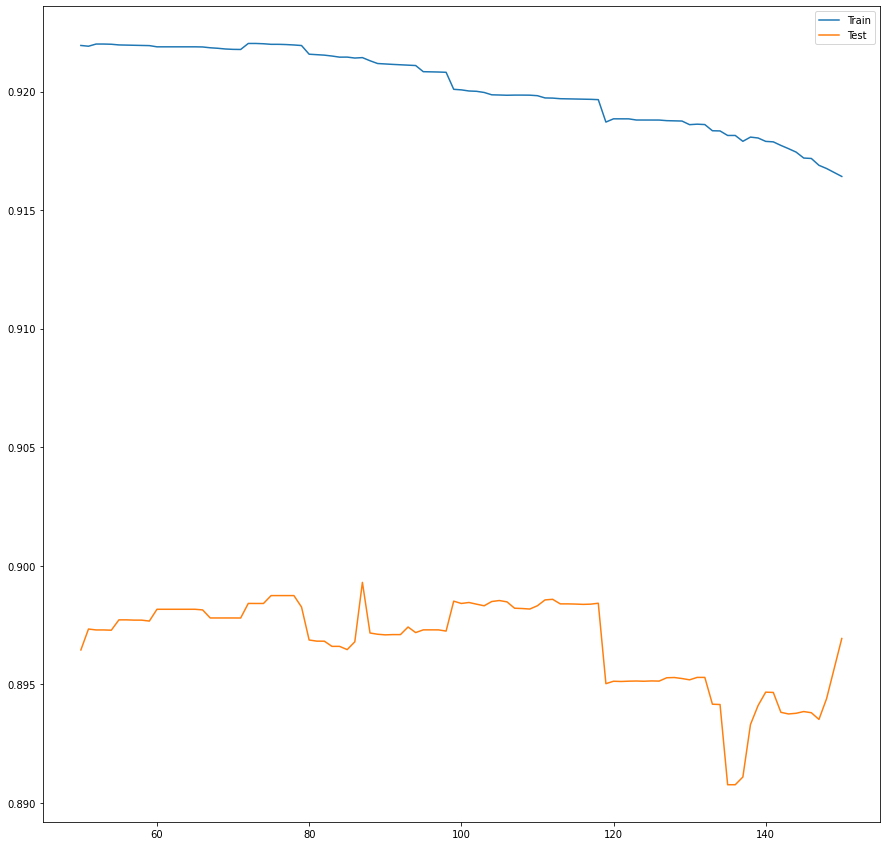

In [62]:
# parameters values
# param_values = [int(x) for x in np.linspace(1, 30, num = 30)] # max_depth
# param_values = [int(x) for x in np.linspace(50, 100, num = 50)] # min_samples_split
param_values = [int(x) for x in np.linspace(50, 150, num = 100)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = DecisionTreeClassifier(max_depth = 6, min_samples_split = 80, min_samples_leaf = i)
    model.fit(X_over_smote, y_over_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_over_smote)
    train_auc = roc_auc_score(y_over_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; div: '+ str(train_auc - test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

**Feature Importance**

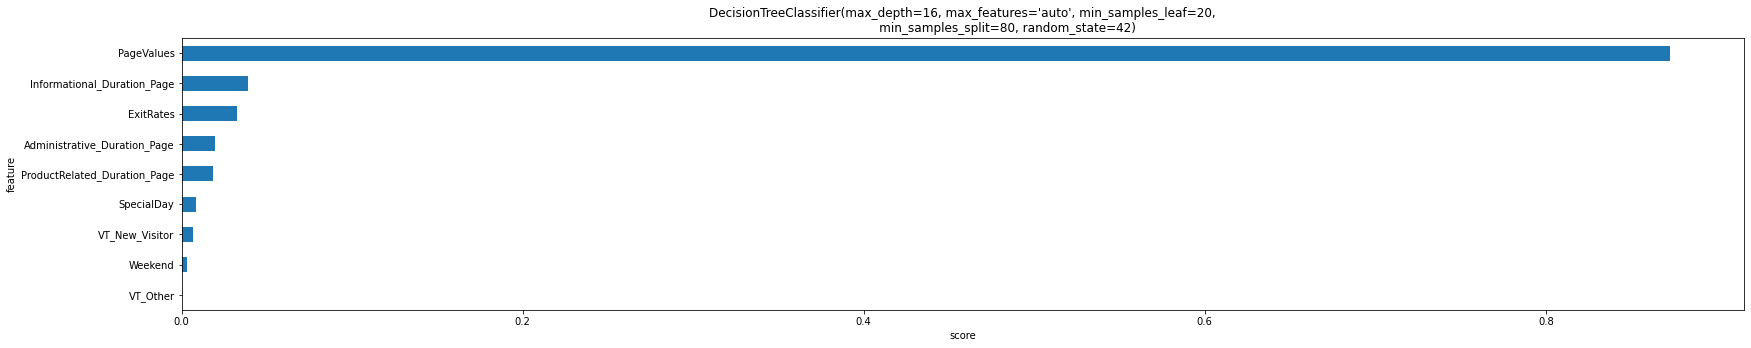

In [63]:
show_feature_importance(dt_tuned.best_estimator_)

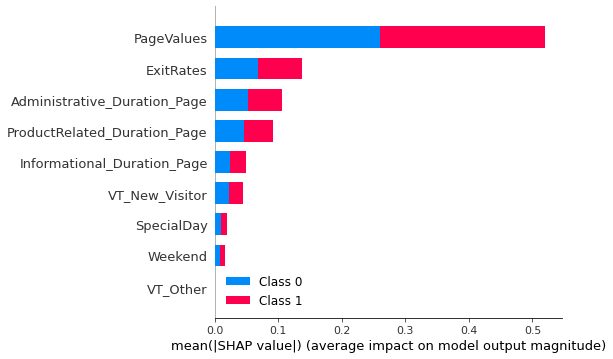

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_over_smote, y_over_smote)
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Random Forest

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_over_smote, y_over_smote)
eval_classification(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.88
Precision Score (Train set):1.00
Precision Score (Test set):0.57
Recall Score (Train set):1.00
Recall Score (Test set):0.72
F1 Score (Train set):1.00
F1 Score (Test set):0.64
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.89


Based on the simulation results above, the model is indicated to be overfitting.

**Hyperparameter Tunning**

In [66]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [41, 42, 43, 44, 45] # Number of trees in random forest
criterion = ['gini', 'entropy'] # Number of criterion to consider at every split
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)] # Maximum number of levels in tree
min_samples_split = [17] # Minimum number of samples required to split a node
min_samples_leaf = [7] # Minimum number of samples required at each leaf node

hyperparameters = dict(n_estimators = n_estimators, criterion = criterion, 
                       max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

In [67]:
rf = RandomForestClassifier(random_state = 42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring = 'roc_auc', random_state = 42, cv = 5)
rf_tuned.fit(X_over_smote, y_over_smote)
eval_classification(rf_tuned)

Accuracy Score(Train set): 0.89
Accuracy Score(Test set): 0.88
Precision Score (Train set):0.62
Precision Score (Test set):0.56
Recall Score (Train set):0.81
Recall Score (Test set):0.79
F1 Score (Train set):0.70
F1 Score (Test set):0.66
ROC AUC Score (Train-proba): 0.94
ROC AUC Score (Test-proba): 0.91


In [68]:
print('Best n_estimators:', rf_tuned.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', rf_tuned.best_estimator_.get_params()['criterion'])
print('Best max_depth:', rf_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', rf_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', rf_tuned.best_estimator_.get_params()['min_samples_leaf'])

Best n_estimators: 44
Best criterion: entropy
Best max_depth: 10
Best min_samples_split: 17
Best min_samples_leaf: 7


**Analyzing Learning Curve**

param value: 1; train: 0.874574075273693; test: 0.8542612981797835; div: 0.02031277709390955
param value: 2; train: 0.8899501508739988; test: 0.8726929895094209; div: 0.01725716136457789
param value: 3; train: 0.9056559615109355; test: 0.8868677321822379; div: 0.018788229328697614
param value: 4; train: 0.9179613177609283; test: 0.9037685677608657; div: 0.014192750000062593
param value: 5; train: 0.9256806009668814; test: 0.9027176289692336; div: 0.022962971997647852
param value: 6; train: 0.9326507120500206; test: 0.9033656491134028; div: 0.02928506293661781
param value: 7; train: 0.9386171881151865; test: 0.904026894158473; div: 0.034590293956713425
param value: 8; train: 0.9461384091957304; test: 0.9070953650542868; div: 0.03904304414144366
param value: 9; train: 0.9520342291384066; test: 0.9041917645897106; div: 0.047842464548696007
param value: 10; train: 0.9565729782903585; test: 0.9036166283438428; div: 0.05295634994651566
param value: 11; train: 0.9616535860067131; test: 0.9029

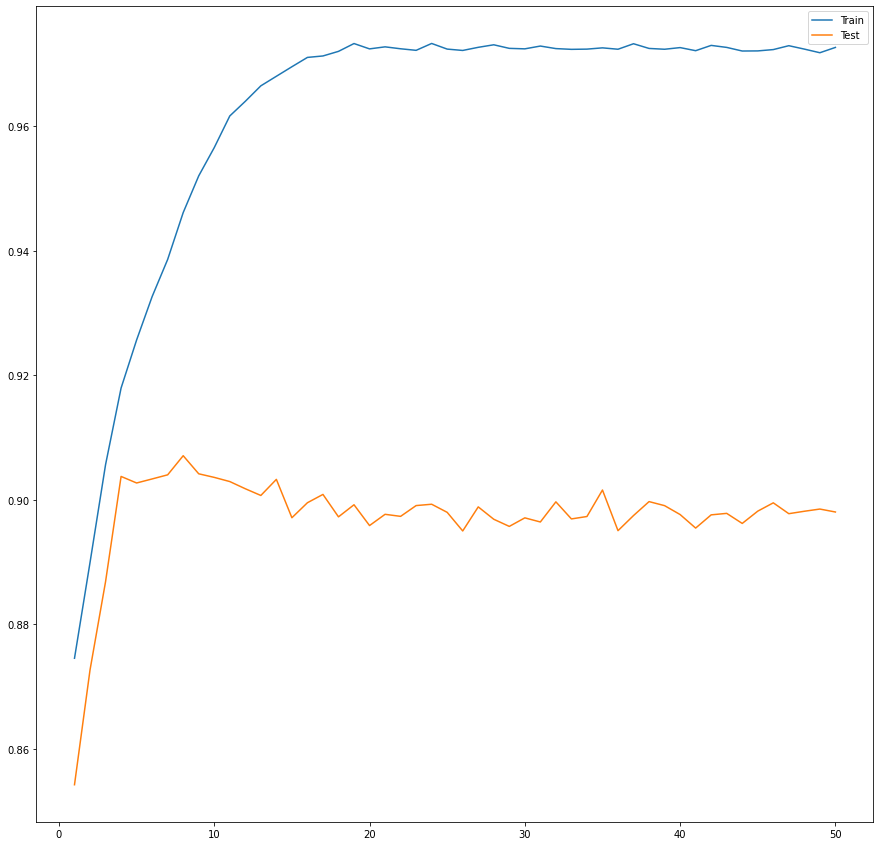

In [69]:
# parameters values
# param_values = [int(x) for x in np.linspace(1, 200, 200)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 50, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators = 43, max_depth = i, min_samples_split = 17, min_samples_leaf = 7)
    model.fit(X_over_smote, y_over_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_over_smote)
    train_auc = roc_auc_score(y_over_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; div: '+ str(train_auc - test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

**Feature Importance**

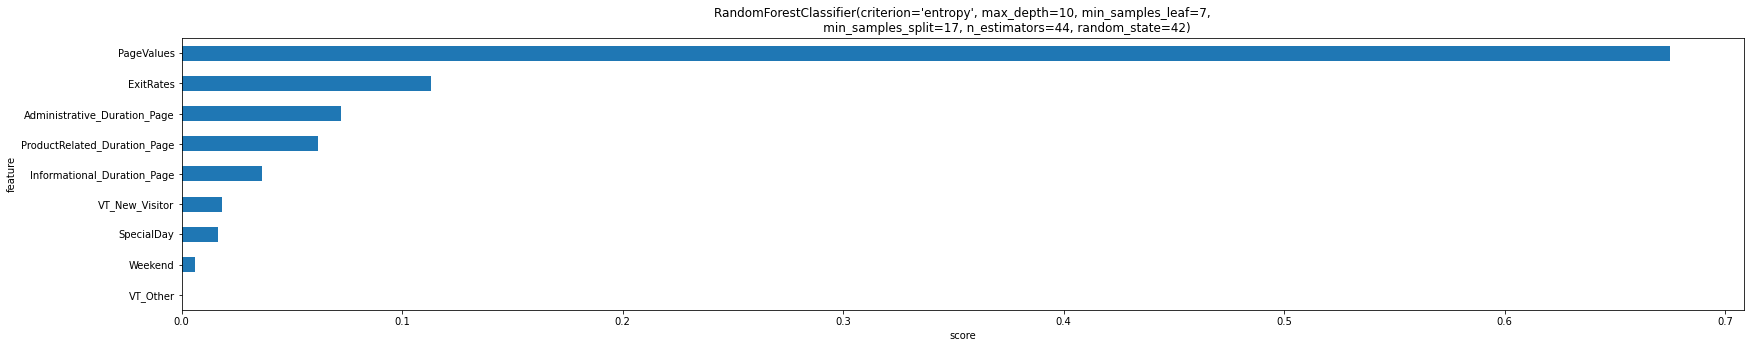

In [70]:
show_feature_importance(rf_tuned.best_estimator_)

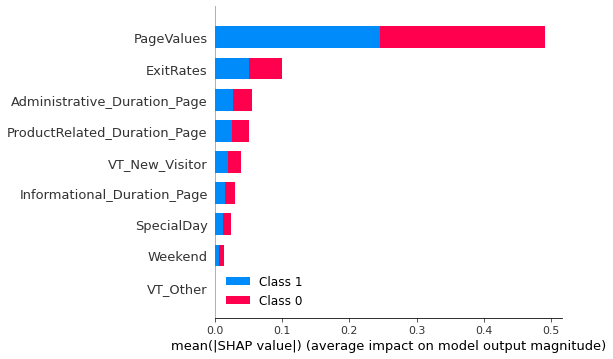

In [71]:
rf = RandomForestClassifier()
rf.fit(X_over_smote, y_over_smote)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### AdaBoost

In [72]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_over_smote, y_over_smote)
eval_classification(ab)

Accuracy Score(Train set): 0.88
Accuracy Score(Test set): 0.87
Precision Score (Train set):0.59
Precision Score (Test set):0.55
Recall Score (Train set):0.77
Recall Score (Test set):0.75
F1 Score (Train set):0.67
F1 Score (Test set):0.64
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.89


**Hyperparameter Tuning**

In [73]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME.R']
                      )

In [74]:
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state = 42, cv = 5, scoring = 'roc_auc')
ab_tuned.fit(X_over_smote, y_over_smote)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy Score(Train set): 0.88
Accuracy Score(Test set): 0.87
Precision Score (Train set):0.59
Precision Score (Test set):0.55
Recall Score (Train set):0.79
Recall Score (Test set):0.77
F1 Score (Train set):0.67
F1 Score (Test set):0.64
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.90


**Feature Importance**

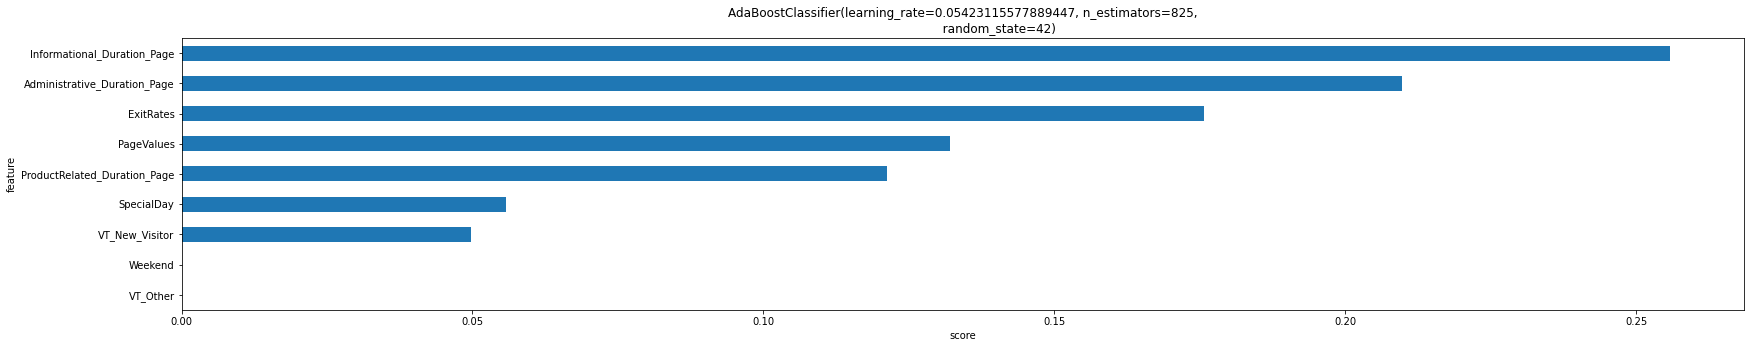

In [75]:
show_feature_importance(ab_tuned.best_estimator_)

### XGBoost

In [76]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_over_smote, y_over_smote)
eval_classification(xgb)

Accuracy Score(Train set): 0.88
Accuracy Score(Test set): 0.88
Precision Score (Train set):0.60
Precision Score (Test set):0.56
Recall Score (Train set):0.80
Recall Score (Test set):0.79
F1 Score (Train set):0.69
F1 Score (Test set):0.66
ROC AUC Score (Train-proba): 0.92
ROC AUC Score (Test-proba): 0.91


**Hyperparameters tuning**

In [77]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 20, num = 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(50, 100, num = 50)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    #'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 15)]
                    }

In [78]:
xgb = XGBClassifier(random_state = 42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv = 5, random_state = 42, scoring = 'roc_auc')
xgb_tuned.fit(X_over_smote, y_over_smote)
eval_classification(xgb_tuned)

Accuracy Score(Train set): 0.89
Accuracy Score(Test set): 0.88
Precision Score (Train set):0.62
Precision Score (Test set):0.57
Recall Score (Train set):0.79
Recall Score (Test set):0.77
F1 Score (Train set):0.70
F1 Score (Test set):0.66
ROC AUC Score (Train-proba): 0.92
ROC AUC Score (Test-proba): 0.91


**Analyzing Learning Curve**

param value: 1; train: 0.9075632695223662; test: 0.8941282027771117; div: 0.01343506674525452
param value: 2; train: 0.922001963553621; test: 0.9075320806707199; div: 0.014469882882901075
param value: 3; train: 0.9335093497658438; test: 0.907961155233299; div: 0.025548194532544755
param value: 4; train: 0.9453927475747476; test: 0.9065810633525653; div: 0.038811684222182286
param value: 5; train: 0.9557586194456976; test: 0.9052568099423042; div: 0.05050180950339345
param value: 6; train: 0.965576057834451; test: 0.9005252342864667; div: 0.0650508235479843
param value: 7; train: 0.972574388697503; test: 0.9010871456314331; div: 0.0714872430660699
param value: 8; train: 0.9803452627038466; test: 0.8982149910423338; div: 0.08213027166151277
param value: 9; train: 0.9845451417563914; test: 0.8981638547588484; div: 0.086381286997543
param value: 10; train: 0.9903996696637173; test: 0.8964663652564807; div: 0.09393330440723657
param value: 11; train: 0.9929730420612426; test: 0.896711466753

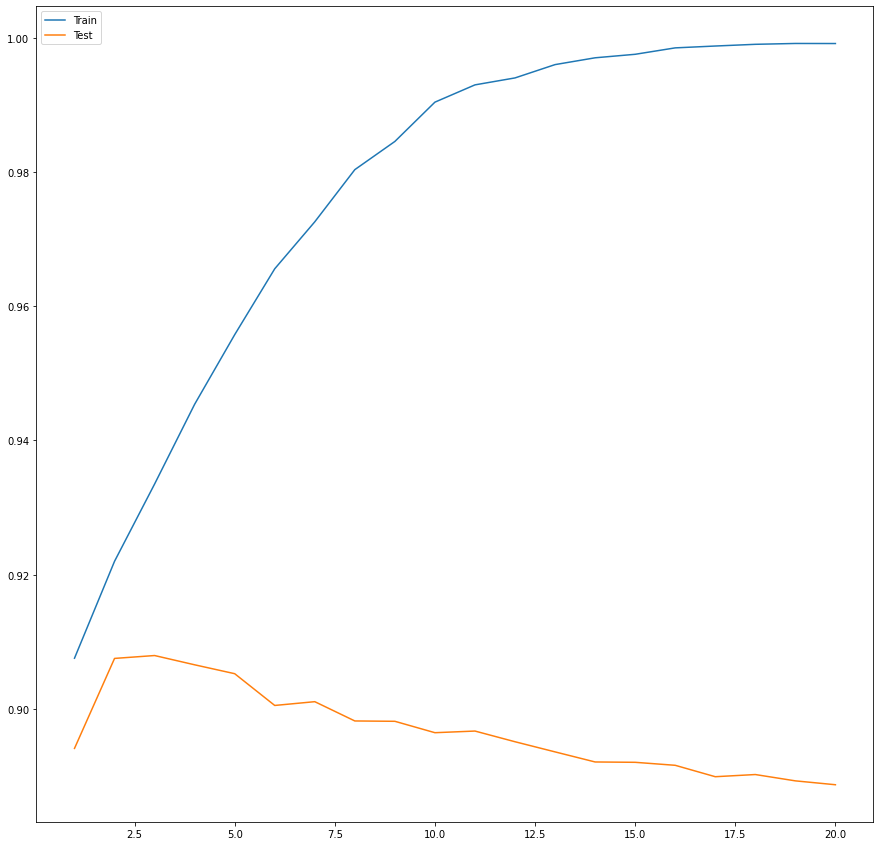

In [79]:
# parameters values
param_values = [int(x) for x in np.linspace(1, 20, num = 20)]     # max_depth
# param_values = [int(x) for x in np.linspace(1, 100, num = 100)]   # min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 20)]    # gamma
# param_values = [float(x) for x in np.linspace(0, 1, num = 15)]    # colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 20)]    # eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 20)]    # lambda
# param_values = [float(x) for x in np.linspace(0, 1, num = 20)]    # alpha

train_scores = []
test_scores = []

for i in param_values:
    model = XGBClassifier(max_depth = i)
    model.fit(X_over_smote, y_over_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_over_smote)
    train_auc = roc_auc_score(y_over_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; div: '+ str(train_auc - test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

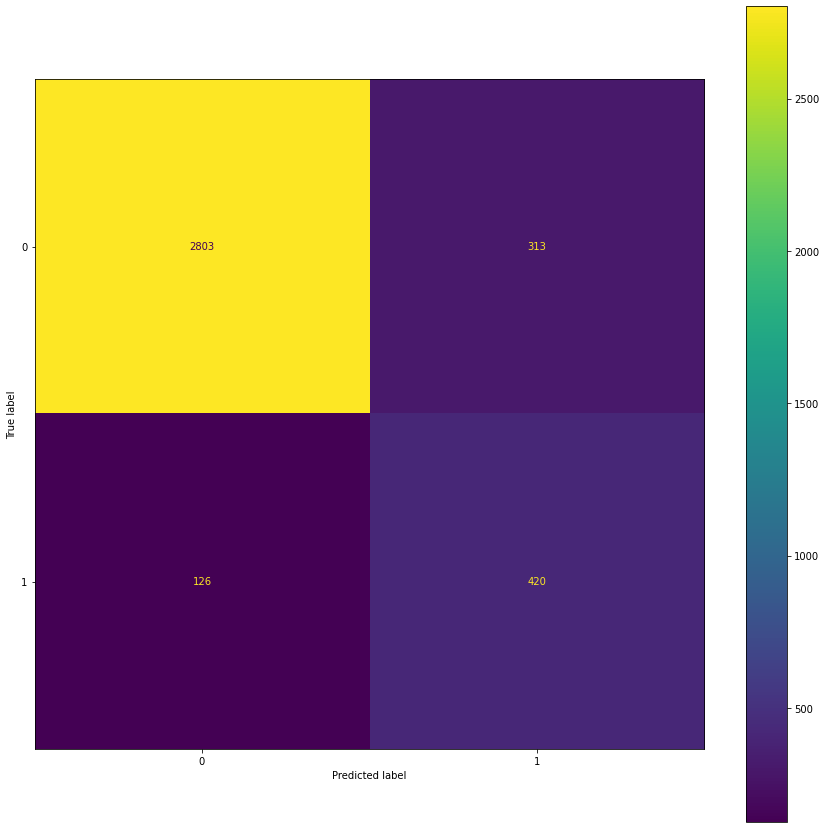

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xgb = XGBClassifier(random_state = 42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv = 5, random_state = 42, scoring = 'roc_auc')
xgb_tuned.fit(X_over_smote, y_over_smote)

predictions = xgb_tuned.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels = xgb_tuned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_tuned.classes_)
disp.plot()
plt.show()

**Feature Importance**

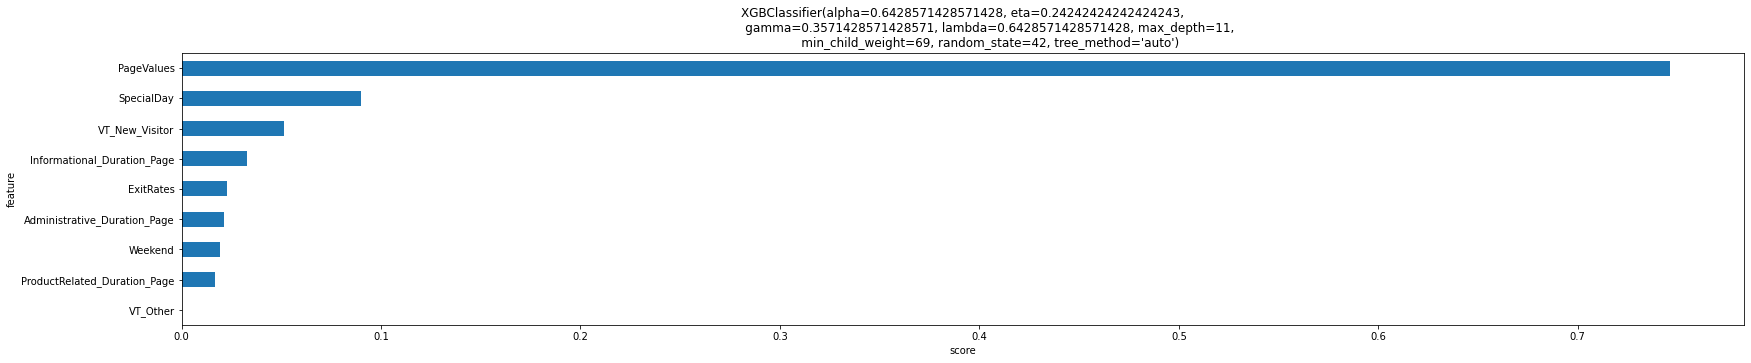

In [81]:
show_feature_importance(xgb_tuned.best_estimator_)

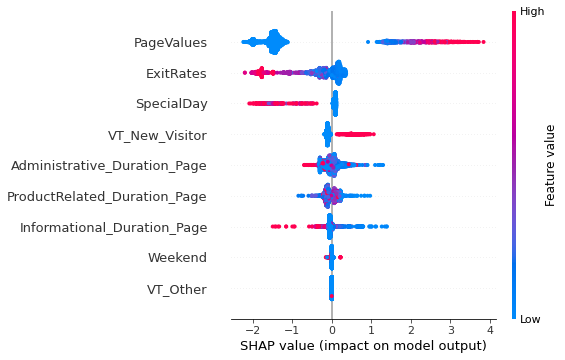

In [82]:
xgb = XGBClassifier()
xgb.fit(X_over_smote, y_over_smote)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)